<a href="https://colab.research.google.com/github/jfogarty/machine-learning-intro-workshop/blob/master/notebooks/plot_mnist_filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization of MLP weights on MNIST

- From [Visualization of MLP weights on MNIST](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html#sphx-glr-download-auto-examples-neural-networks-plot-mnist-filters-py) in [scikit-learn.org](https://scikit-learn.org/stable/) documentation site.

Updated by [John Fogarty](https://github.com/jfogarty) for Python 3.6 and [Base2 MLI](https://github.com/base2solutions/mli) and [colab](https://colab.research.google.com) standalone evaluation.



In [0]:
%matplotlib inline


## Introduction

Sometimes looking at the learned coefficients of a neural network can provide
insight into the learning behavior. For example if weights look unstructured,
maybe some were not used at all, or if very large coefficients exist, maybe
regularization was too low or the learning rate too high.

This example shows how to plot some of the first layer weights in a
MLPClassifier trained on the MNIST dataset.

The input data consists of 28x28 pixel handwritten digits, leading to 784
features in the dataset. Therefore the first layer weight matrix have the shape
(784, hidden_layer_sizes[0]).  We can therefore visualize a single column of
the weight matrix as a 28x28 pixel image.

To make the example run faster, we use very few hidden units, and train only
for a very short time. Training longer would result in weights with a much
smoother spatial appearance.



In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

print(__doc__)

def plot_MNIST_MLP_weights(dataset):
    print(f"- Please be patient. Loading {dataset} ...")
    # Load data from https://www.openml.org/d/554
    X, y = fetch_openml(dataset, version=1, return_X_y=True)
    X = X / 255.

    # rescale the data, use the traditional train/test split
    X_train, X_test = X[:60000], X[60000:]
    y_train, y_test = y[:60000], y[60000:]

    # mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
    #                     solver='sgd', verbose=10, tol=1e-4, random_state=1)
    mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                        solver='sgd', verbose=10, tol=1e-4, random_state=1,
                        learning_rate_init=.1)

    mlp.fit(X_train, y_train)
    print("Training set score: %f" % mlp.score(X_train, y_train))
    print("Test set score: %f" % mlp.score(X_test, y_test))

    fig, axes = plt.subplots(4, 4)
    # use global min / max to ensure all weights are shown on the same scale
    vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
    for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
        ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
                vmax=.5 * vmax)
        ax.set_xticks(())
        ax.set_yticks(())

    plt.show()

Automatically created module for IPython interactive environment


## Datasets

This example assumes that the inputs are MNIST formatted datasets.  This means they have 28x28 pixel grayscale images grouped into ten categories.

The [OpenML datasets](https://www.openml.org/search?type=data) is used as the source for this routine.



- Please be patient. Loading mnist_784 ...
Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.986800
Test set score: 0.970000


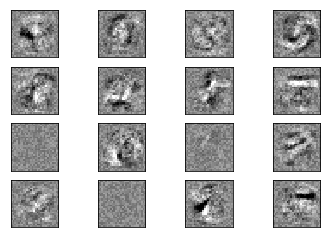

In [8]:
plot_MNIST_MLP_weights('mnist_784')

## Fashion MNIST

- Please be patient. Loading Fashion-MNIST ...
Iteration 1, loss = 0.53238440
Iteration 2, loss = 0.39300993
Iteration 3, loss = 0.35940922
Iteration 4, loss = 0.34054618
Iteration 5, loss = 0.32284530
Iteration 6, loss = 0.31124182
Iteration 7, loss = 0.30183898
Iteration 8, loss = 0.29540012
Iteration 9, loss = 0.28711181
Iteration 10, loss = 0.27971370


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.903200
Test set score: 0.866500


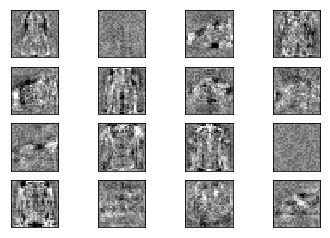

In [6]:
plot_MNIST_MLP_weights('Fashion-MNIST')

### Kuzshiji MNIST

- Please be patient. Loading Kuzushiji-MNIST ...
Iteration 1, loss = 0.48347200
Iteration 2, loss = 0.25872265
Iteration 3, loss = 0.20553561
Iteration 4, loss = 0.17547070
Iteration 5, loss = 0.15350170
Iteration 6, loss = 0.13703349
Iteration 7, loss = 0.12458950
Iteration 8, loss = 0.11457941
Iteration 9, loss = 0.10640869
Iteration 10, loss = 0.09907250


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.978083
Test set score: 0.862500


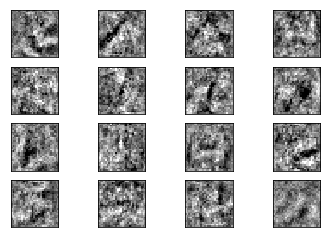

In [7]:
plot_MNIST_MLP_weights('Kuzushiji-MNIST')

### End of notebook.